In [58]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [2]:
df = pd.read_excel('loan_data.xlsx')

In [3]:
df

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1
...,...,...,...,...,...,...,...
1335,34100,0.0,1.0,0.0,NaN,0.576,1
1336,34110,1.0,1.0,0.0,46.0,3.705,0
1337,34113,1.0,1.0,0.0,39.0,0.099,1
1338,34145,1.0,0.0,0.0,8.0,3.177,0


In [4]:
df.isnull().sum()/len(df)

Cutomer id     0.000000
Cards          0.008955
Debit card     0.030597
Insurance      0.035821
Age            0.141045
Cibil Score    0.000000
Loan offer     0.000000
dtype: float64

In [5]:
df['Age'].skew()

0.41003504706170973

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [14]:
df.isnull().sum()/len(df)

Cutomer id     0.0
Cards          0.0
Debit card     0.0
Insurance      0.0
Age            0.0
Cibil Score    0.0
Loan offer     0.0
dtype: float64

In [8]:
df = df.dropna()

In [9]:
df['Debit card'].mode()

0    1.0
Name: Debit card, dtype: float64

In [10]:
df['Debit card'] = df['Debit card'].fillna(df['Debit card'].mode()[0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12364\3210967205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Debit card'] = df['Debit card'].fillna(df['Debit card'].mode()[0])


In [11]:
df['Insurance'] = df['Insurance'].fillna(df['Insurance'].mode()[0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12364\3396961530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insurance'] = df['Insurance'].fillna(df['Insurance'].mode()[0])


In [15]:
df1 = df

In [13]:
df['Age'].mean()

28.563983489191912

In [16]:
df1

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.000000,34.940,0
1,3,1.0,0.0,0.0,18.000000,0.891,1
2,66,0.0,1.0,0.0,5.000000,0.330,1
3,70,0.0,1.0,1.0,31.000000,0.037,0
4,96,0.0,1.0,0.0,30.000000,0.038,1
...,...,...,...,...,...,...,...
1335,34100,0.0,1.0,0.0,28.414422,0.576,1
1336,34110,1.0,1.0,0.0,46.000000,3.705,0
1337,34113,1.0,1.0,0.0,39.000000,0.099,1
1338,34145,1.0,0.0,0.0,8.000000,3.177,0


In [18]:
df['Loan offer'].unique()

array([0, 1], dtype=int64)

In [25]:
X = df[['Cards','Debit card','Insurance','Cibil Score']]
y = df[['Loan offer']]

In [19]:
df.columns

Index(['Cutomer id', 'Cards', 'Debit card', 'Insurance', 'Age', 'Cibil Score',
       'Loan offer'],
      dtype='object')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
model.fit(X_train, y_train)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [60]:
accuracy

0.7125984251968503

In [61]:
conf_matrix

array([[86, 45],
       [28, 95]], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

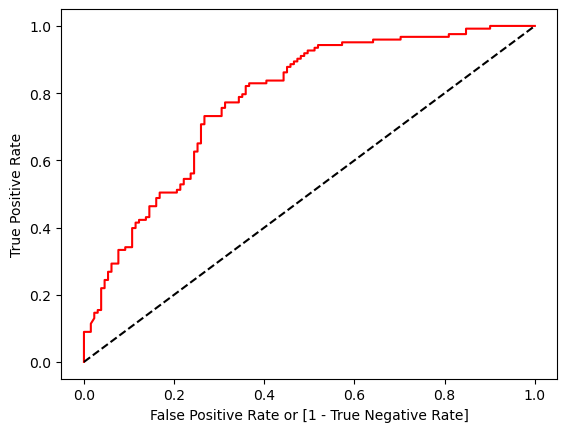

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [65]:
conf_matrix

array([[86, 45],
       [28, 95]], dtype=int64)